In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.unumpy import uarray
from uncertainties import unumpy as unp
from uncertainties.unumpy import (nominal_values as noms,std_devs as stds)
from scipy.stats import sem
import pandas as pd

In [3]:
contrast_df = pd.read_csv('../data/contrast.csv')
gas_refrac_df = pd.read_csv('../data/refrac_index_gas.csv')
glass_refrac_df = pd.read_csv('../data/refrac_index_glass.csv')

In [21]:
# average intensities
contrast_df["Imax_avg"] = contrast_df[["Imax_1", "Imax_2", "Imax_3"]].mean(axis=1)
contrast_df["Imin_avg"] = contrast_df[["Imin_1", "Imin_2", "Imin_3"]].mean(axis=1)

# contrast calculation
contrast_df["V"] = (contrast_df["Imax_avg"] - contrast_df["Imin_avg"]) / (
    contrast_df["Imax_avg"] + contrast_df["Imin_avg"]
)


In [22]:
contrast_df.head(20)

,Angle_deg,Imax_1,Imin_1,Imax_2,Imin_2,Imax_3,Imin_3,Imax_avg,Imin_avg,K,V
0,0,1.39,1.16,1.44,1.25,1.55,1.35,1.460000,1.253333,0.076167,0.076167
1,15,1.15,0.59,1.17,0.59,1.15,0.63,1.156667,0.603333,0.314394,0.314394
2,30,0.99,0.23,1.06,0.22,1.07,0.23,1.040000,0.226667,0.642105,0.642105
3,45,1.10,0.09,1.14,0.09,1.17,0.10,1.136667,0.093333,0.848238,0.848238
4,60,1.42,0.13,1.52,0.13,1.47,0.19,1.470000,0.150000,0.814815,0.814815
5,75,1.48,0.40,1.55,0.39,1.55,0.42,1.526667,0.403333,0.582038,0.582038
6,90,1.66,1.30,1.82,1.23,1.79,1.20,1.756667,1.243333,0.171111,0.171111
7,105,2.26,1.07,2.48,1.06,2.66,1.19,2.466667,1.106667,0.380597,0.380597
8,120,3.46,0.53,3.59,0.53,3.74,0.54,3.596667,0.533333,0.741727,0.741727
9,135,4.00,0.30,4.19,0.32,4.30,0.30,4.163333,0.306667,0.862789,0.862789


In [23]:
V = contrast_df['V']
angle = contrast_df['Angle_deg']

In [37]:
def V_th(phi):
   return np.abs(np.sin(2*phi* np.pi / 180))

phi_space = np.linspace(0,180,1000)


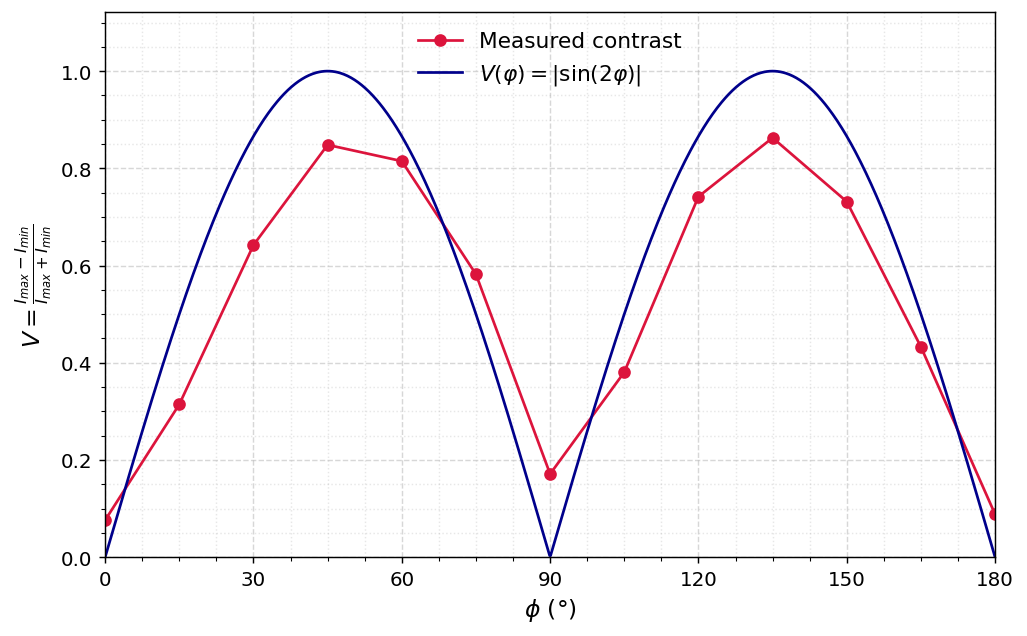

In [40]:
plt.figure(figsize=(8, 5),dpi=130)

# Main line
plt.plot(angle, V, color='crimson', linewidth=1.5, marker='o', markersize=6, label='Measured contrast')
plt.plot(phi_space, V_th(phi_space), color='darkblue', linewidth=1.5, label= r"$V(\varphi) = |\sin(2\varphi)|$")
# Grid and axes
plt.grid(True, which='major', linestyle='--', alpha=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', alpha=0.3)

# Labels and title
plt.xlabel(r"$\phi$ (°)", fontsize=13)
plt.ylabel("$V = \\frac{I_{max} - I_{min}}{I_{max} + I_{min}}$", fontsize=13)

# Axis and legend style
plt.xlim(0, 180)
plt.ylim(0, 1.3 * V.max())
plt.legend(frameon=False, fontsize=12)

# Optional: nicer ticks
plt.xticks(range(0, 181, 30))
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

# Tight layout for clean export
plt.tight_layout()
plt.show()